# Triangle Heatmap

# ================

## This section contains a supplemental procedure for using matplotlibn to create a triangle correlation heatmap.

# ================

# Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [3]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_cleaned_v2.csv'))

In [4]:
df.shape

(12230, 14)

In [5]:
df.head()

,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
1,1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
2,2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
3,3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
4,4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0.0,0.0


In [6]:
# drop unnamed column

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0.0,0.0


In [8]:
# Include matplotlib option for ease of calling charts

%matplotlib inline

In [19]:
# Drop columns unecessary for matrix conditions

df_viz = df.drop(columns = ['pressure_hpa', 'latitude', 'longitude'])

In [20]:
df_viz.head()

,name,year,month,day,hour,status,category,wind_knots,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975,6,27,0,tropical depression,-1,25,0.0,0.0
1,Amy,1975,6,27,6,tropical depression,-1,25,0.0,0.0
2,Amy,1975,6,27,12,tropical depression,-1,25,0.0,0.0
3,Amy,1975,6,27,18,tropical depression,-1,25,0.0,0.0
4,Amy,1975,6,28,0,tropical depression,-1,25,0.0,0.0


# Create a correlation matrix in prep for heatmap

In [21]:
# Create a correlation matrix for heatmap

df_viz.corr()

,year,month,day,hour,category,wind_knots,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
year,1.000000,-0.014053,0.006731,0.001888,0.045862,0.040593,0.534745,0.275130
month,-0.014053,1.000000,-0.178296,-0.007921,0.129145,0.144401,0.073425,0.079446
day,0.006731,-0.178296,1.000000,0.001129,-0.005890,-0.006680,-0.006611,0.010948
hour,0.001888,-0.007921,0.001129,1.000000,0.000654,-0.000959,-0.002241,-0.003313
category,0.045862,0.129145,-0.005890,0.000654,1.000000,0.965422,0.324988,0.485081
wind_knots,0.040593,0.144401,-0.006680,-0.000959,0.965422,1.000000,0.342760,0.487644
trop_storm_force_wind_diameter,0.534745,0.073425,-0.006611,-0.002241,0.324988,0.342760,1.000000,0.717989
hurricane_force_wind_diameter,0.275130,0.079446,0.010948,-0.003313,0.485081,0.487644,0.717989,1.000000


# Create triangle correlation heatmap

In [22]:
# define mask

mask = np.triu(np.ones_like(df_viz.corr()))

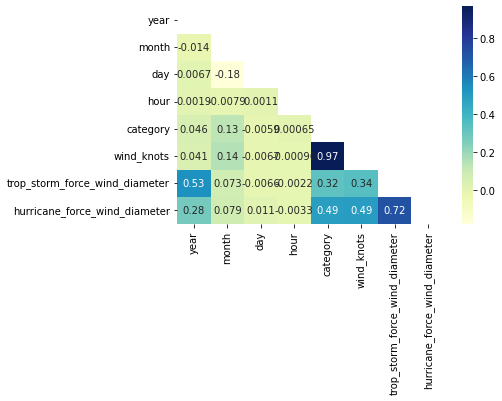

In [24]:
dataplot = sns.heatmap(df_viz.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.show()